# Benchmark Sorting Algorithms

Runs through a few sorting algorithms and shows how long it took on different size arrays

## Benchmark Code Setup

In [1]:
import random
import time
import copy
from collections import defaultdict, namedtuple

import matplotlib.pyplot as plt

In [2]:
TimedReturn = namedtuple('TimedReturn', ['ret', 'elapsed_seconds'])

def time_function(func, *args, **kwargs) -> TimedReturn:
    """
    How many seconds it took to execute function
    """
    # shallow copy params to avoid in place changes for benchmark inputs
    copied_args = tuple(copy.copy(a) for a in args)
    copied_kwargs = {k: copy.copy(v) for k, v in kwargs.items()}
    
    start = time.perf_counter()
    ret = func(*copied_args, **copied_kwargs)
    end = time.perf_counter()

    elapsed_seconds = end - start
    
    return TimedReturn(ret, elapsed_seconds)

def generate_random_int_array(size=100, start=-1000, end=1000, uniques=False) -> list:
    """
    Generate random int array with given constraints
    """
    if uniques:
        assert end - start + 1 >= size, "Range too small for unique values"
        return random.sample(range(start, end + 1), size)
        
    return [random.randint(start, end) for _ in range(size)]

def benchmark_sorting(algorithms, sizes, num_trials=3, uniques=False, **array_kwargs) -> dict:
    """
    Go through each function in algorithms and run consecutive trials of different sizes

    Return timings
    """
    results = defaultdict(list)

    for n in sizes:
        print(f"#️⃣ N: {n}\n")
        for name, func in algorithms:
            print(f"\t{name}")
            print("\t[ ", end="", flush=True)

            trials = []
            errors = []
            
            for _ in range(num_trials):
                arr = generate_random_int_array(n, uniques=uniques, **array_kwargs)
                try:
                    elapsed = time_function(func, arr).elapsed_seconds
                    symbol = "■"
                except Exception as e:
                    elapsed = None
                    symbol = "✖"
                    errors.append(e)
                trials.append(elapsed)
                print(symbol, end=" ", flush=True)

            print("]")

            if len(errors) == 0:
                avg = sum(trials) / len(trials)
                print(f"\t⏱️ Avg: {avg:.6f} s\n")
            else:
                avg = None
                print(f"\t⏱️ Avg: ❌\n")
                for i, error in enumerate(errors):
                    print(f"{i}: {error}")

            results[name].append(avg)

    return results

def print_summary(sizes, results):
    """
    Print summary
    """
    for name, times in results.items():
        print(f"{name}:")
        for n, time in zip(sizes, times):
            throughput = n / time if time else float('inf')
            print(f"  • {n:,} elems in {time:.6f}s ({throughput:,.0f} e/s)")
        print()

## Benchmark Tests

In [3]:
# get repo files if using colab
if get_ipython().__class__.__module__.startswith("google.colab"):
    !git clone https://github.com/rossmassey/dsa_notebooks /content/dsa_notebooks/
    %cd /content/dsa_notebooks/

# load sorting algorithms into namespace
%run algorithms/sorting_algorithms.ipynb

In [4]:
trial_sizes = [500, 1000, 2000, 5000, 10000, 20000, 40000]
    
algorithms = [
    ("Built-in sorted", sorted), 
    ("Bubble Sort", bubble_sort),
    ("Selection Sort", selection_sort),
    ("Insertion Sort", insertion_sort),
    ("Top Down Merge Sort", top_down_merge_sort),
    ("Bottom Up Merge Sort", bottom_up_merge_sort_less_space),
]

results = benchmark_sorting(algorithms, trial_sizes)

#️⃣ N: 500

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000027 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.006118 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.001743 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.002659 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000336 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000265 s

#️⃣ N: 1000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000051 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.026333 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.007065 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.011801 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000628 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000543 s

#️⃣ N: 2000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000105 s

	Bubble Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.106083 s

	Selection Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.027155 s

	Insertion Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.048880 s

	Top Down Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.001427 s

	Bottom Up Merge Sort
	[ ■ ■ ■ ]
	⏱️ Avg: 0.001222 s

#️⃣ N: 5000

	Built-in sorted
	[ ■ ■ ■ ]
	⏱️ Avg: 0.000290 s

	Bubble S

## Benchmark Summary

In [5]:
print_summary(trial_sizes, results)

Built-in sorted:
  • 500 elems in 0.000027s (18,566,435 e/s)
  • 1,000 elems in 0.000051s (19,422,757 e/s)
  • 2,000 elems in 0.000105s (18,992,329 e/s)
  • 5,000 elems in 0.000290s (17,223,227 e/s)
  • 10,000 elems in 0.000673s (14,868,658 e/s)
  • 20,000 elems in 0.001399s (14,297,346 e/s)
  • 40,000 elems in 0.002901s (13,787,359 e/s)

Bubble Sort:
  • 500 elems in 0.006118s (81,725 e/s)
  • 1,000 elems in 0.026333s (37,975 e/s)
  • 2,000 elems in 0.106083s (18,853 e/s)
  • 5,000 elems in 0.714006s (7,003 e/s)
  • 10,000 elems in 2.771629s (3,608 e/s)
  • 20,000 elems in 11.132111s (1,797 e/s)
  • 40,000 elems in 44.288926s (903 e/s)

Selection Sort:
  • 500 elems in 0.001743s (286,866 e/s)
  • 1,000 elems in 0.007065s (141,549 e/s)
  • 2,000 elems in 0.027155s (73,651 e/s)
  • 5,000 elems in 0.169772s (29,451 e/s)
  • 10,000 elems in 0.684681s (14,605 e/s)
  • 20,000 elems in 2.678551s (7,467 e/s)
  • 40,000 elems in 11.089220s (3,607 e/s)

Insertion Sort:
  • 500 elems in 0.002659

## Plot

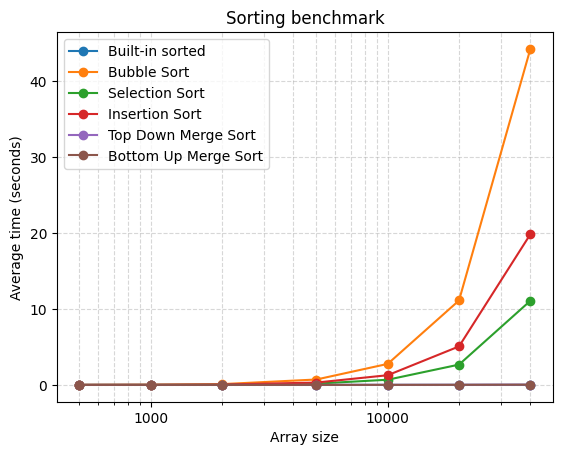

In [6]:
fig, ax = plt.subplots()

# plot results
for name, times in results.items():
    ax.plot(trial_sizes, times, marker='o', label=name)

# logarithmic scale for x axis
ax.set_xscale('log')
ax.xaxis.set_major_formatter(plt.ScalarFormatter())

ax.set_title("Sorting benchmark")
ax.set_xlabel('Array size')
ax.set_ylabel('Average time (seconds)')
ax.legend()
ax.grid(True, which='both', ls='--', alpha=0.5)

plt.show()